### 법규위반 연령대 운전경력 요일별 시각화 

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
#f_path = '../font/nanum-all/NanumGothicBold.ttf'
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
plt.rcParams['font.family'] = font_name

In [5]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
from prophet import Prophet
from glob import glob

In [451]:
# font default 설정 
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
plt.rcParams['text.usetex'] = False

### 요일별 막대그래프

In [275]:
total_files = glob(f"../project/result/sigak/*")
tmp_raw = []
# A:C = 시도,군,연도     AF:BA = 법규위반    DR:EE = 연령별  EF:ES = 요일별  ET:FK = 운전경력   (발생건수 , 사망 )
for name in total_files:
    tmp = pd.read_excel(name, usecols='A:C, EF:ES')
    tmp_raw.append(tmp)

day_raw = pd.concat(tmp_raw)
#day_raw.to_excel('../project/result/sigak/day_raw.xlsx')

In [305]:
day_raw['치사율_화요일'] = round(day_raw.iloc[:,16]/day_raw.iloc[:,9],3)*100

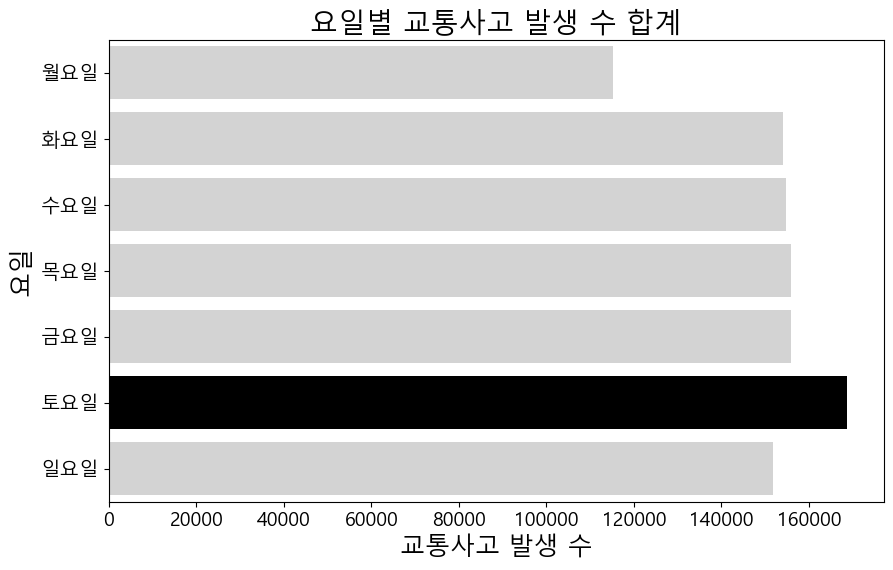

In [452]:
df_sum = day_raw[['발생_월요일', '발생_화요일', '발생_수요일', '발생_목요일', '발생_금요일', '발생_토요일', '발생_일요일']].sum()
df_death_sum = day_raw[['사망_월요일', '사망_화요일', '사망_수요일', '사망_목요일', '사망_금요일', '사망_토요일', '사망_일요일']].sum()
df_deathRatio_mean = day_raw[['치사율_월요일', '치사율_화요일', '치사율_수요일', '치사율_목요일', '치사율_금요일', '치사율_토요일', '치사율_일요일']].mean()

# 요일 레이블
day_labels = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

# 가장 큰 값을 가지는 막대의 인덱스를 찾습니다.
max_value = df_sum.max()

# 요일 레이블에서 가장 큰 값을 가지는 요일을 기준으로 순서를 조정합니다.
colors = ['black' if value == max_value else 'lightgrey' for value in df_sum]

# seaborn을 사용하여 막대그래프 플로팅
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sum.values, y=day_labels, palette= colors)
plt.xlabel('교통사고 발생 수')
plt.ylabel('요일')
plt.title('요일별 교통사고 발생 수 합계')

#plt.savefig('savefig_day.png', edgecolor='blue', facecolor='#eeeeee')
plt.show()

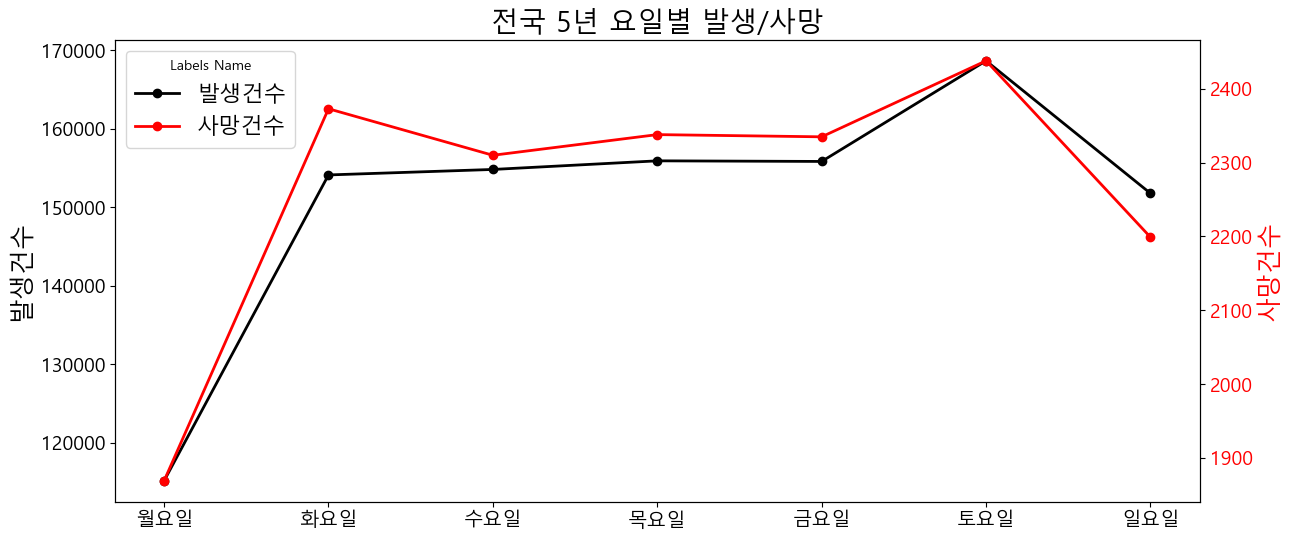

In [506]:

# seaborn을 사용하여 막대그래프 플로팅
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot()
ax.plot(day_labels, df_sum.values, color='black', label = '발생건수', marker='o')
ax.set_ylabel('발생건수')
ax.tick_params(axis='y', labelcolor='black')

# 사망 수 꺽은선 그래프 추가
ax2 = ax.twinx()
ax2.plot(day_labels, df_death_sum.values, marker='o', color='red', label = '사망건수')
ax2.set_ylabel('사망건수', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 치사율 그래프
#ax3 = ax.twinx()
#ax3.plot(day_labels, df_deathRatio_mean.values, marker='o', color='blue', label = '치사율 %')
#ax3.set_ylabel('치사율(%)', color='blue')
#ax3.tick_params(axis='y', labelcolor='blue')
#ax3.spines.right.set_position(("axes", 1.1))

plt.title('전국 5년 요일별 발생/사망')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2 , title="Labels Name", ncols=1)

# y축 범위 설정 
#ax.set_ylim(10000, df_sum.max()*1.3)
#ax2.set_ylim(0, df_death_sum.max()*1.3)
#ax3.set_ylim(df_deathRatio_mean.min()*0.7, df_deathRatio_mean.max()*1.3)
plt.savefig('savefig_day2.png',bbox_inches='tight', pad_inches=0.5)
plt.show()

### 법규위반 

In [86]:
total_files = glob(f"../project/result/sigak/*")
tmp_raw = []
# A:C = 시도,군,연도     AF:BA = 법규위반    DR:EE = 연령별  EF:ES = 요일별  ET:FK = 운전경력   (발생건수 , 사망 )
for name in total_files:
    tmp = pd.read_excel(name, usecols='A:C, AF:BA')
    tmp_raw.append(tmp)

legal_raw = pd.concat(tmp_raw)

In [170]:
# 발생_ 제거
new_columns = [column.split('_')[1] for column in legal_raw.columns if column.startswith('발생_')]
#new_columns = [column.split('_')[1] for column in legal_raw.columns if column.startswith('사망_')]
# 변경된 열 이름을 리스트에 저장
new_columns = ['시도', '구', '연도'] + new_columns + list(legal_raw.columns[len(new_columns)+3:])

# 열 이름을 새로운 열 이름으로 변경
legal_raw.columns = new_columns

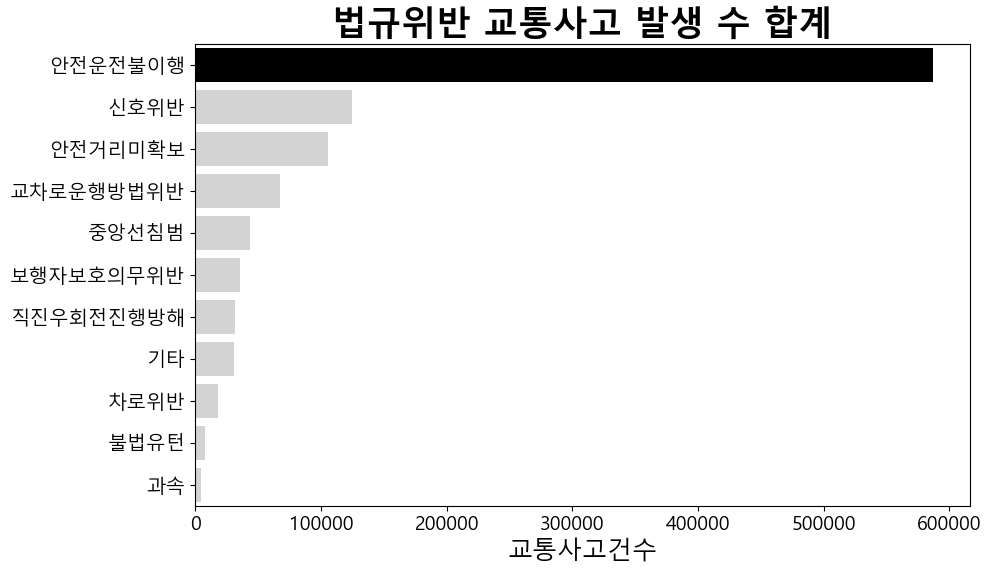

In [255]:
# 발생한 값을 합산
df_legal_occurence_sum = legal_raw.iloc[:,3:14].sum()
df_legal_death_sum = legal_raw.iloc[:,14:].sum()


# 값 내림차순
sorted_values = df_legal_occurence_sum.sort_values(ascending=False)

colors = ['black', 'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray' ]

# seaborn을 사용하여 막대그래프 플로팅
plt.figure(figsize=(10, 6))


sns.barplot(y= sorted_values.index, x=sorted_values.values, palette= colors)

plt.xlabel('교통사고건수')
#plt.ylabel('법규위반')
plt.title('법규위반 교통사고 발생 수 합계', fontweight='bold')
#plt.savefig('savefig_legal.png', edgecolor='blue', facecolor='#eeeeee',bbox_inches='tight', pad_inches=0.5)
plt.show()

In [461]:
df_legal_occurence_sum.sum()

1056368

In [488]:
df_legal_death_sum

사망_과속             974
사망_교차로운행방법위반      217
사망_기타_y           542
사망_보행자보호의무위반      568
사망_불법유턴            67
사망_신호위반          1349
사망_안전거리미확보        291
사망_안전운전불이행      10599
사망_중앙선침범         1096
사망_직진우회전진행방해      115
사망_차로위반            44
dtype: int64

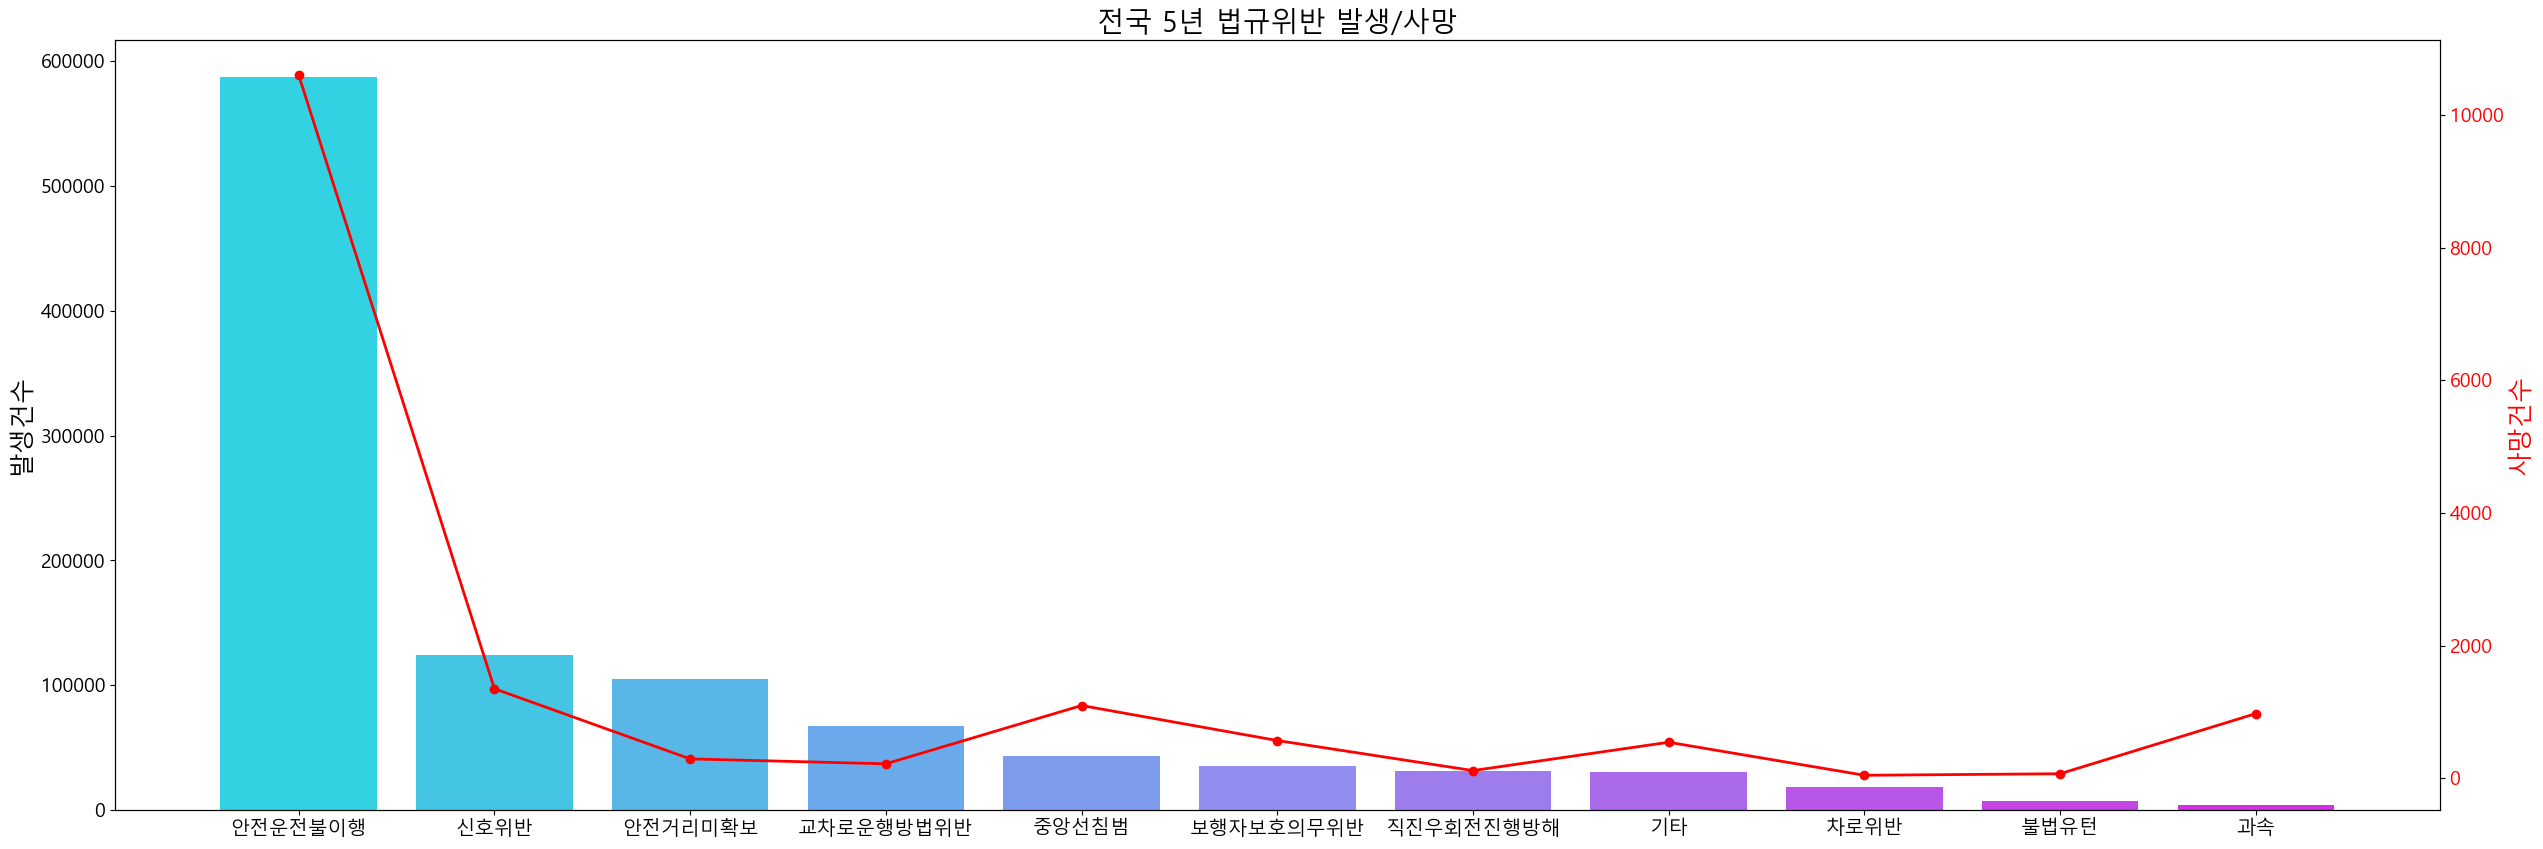

In [504]:
# 각각의 y축 범위 계산
y_max_occurrence = df_legal_occurence_sum.max()
y_max_death = df_legal_death_sum.max()
#colors = ['lightgray', 'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','black','lightgray','lightgray','lightgray']
# 가장 높은 값 찾기
max_value = df_legal_occurence_sum.max()
sorted_values = df_legal_occurence_sum.sort_values(ascending=False)
#sorted_values = df_legal_occurence_sum.sort_values(ascending=False)
# 가장 높은 값 black 지정
colors = ['#4949E8' if value == max_value else 'grey' for value in df_legal_occurence_sum]
colors2 = sns.color_palette('cool',len(df_legal_occurence_sum.index))

# seaborn을 사용하여 막대그래프
plt.figure(figsize=(30, 10))
ax = sns.barplot(x=sorted_values.index, y=sorted_values.values, palette = colors2, label='발생 수')
ax.set_ylabel('발생건수')
ax.tick_params(axis='y', labelcolor='black')


# 사망 수 꺽은선 그래프 추가
ax2 = ax.twinx()
ax2.plot(sorted_values.index, df_legal_death_sum[['사망_안전운전불이행',
 '사망_신호위반',
 '사망_안전거리미확보',
 '사망_교차로운행방법위반',
 '사망_중앙선침범',
 '사망_보행자보호의무위반',
 '사망_직진우회전진행방해',
 '사망_기타_y',
 '사망_차로위반',
 '사망_불법유턴',
 '사망_과속']].values, marker='o', color='red', label='사망건수')
ax2.set_ylabel('사망건수', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('전국 5년 법규위반 발생/사망')
plt.savefig('savefig_legal2.png',bbox_inches='tight', pad_inches=0.5)#, edgecolor='blue', facecolor='#eeeeee')
plt.show()

### 연령별 그래프 

In [179]:
total_files = glob(f"../project/result/sigak/*")
tmp_raw = []
# A:C = 시도,군,연도     AF:BA = 법규위반    DR:EE = 연령별  EF:ES = 요일별  ET:FK = 운전경력   (발생건수 , 사망 )
for name in total_files:
    tmp = pd.read_excel(name, usecols='A:C, DR:EE')
    tmp_raw.append(tmp)

age_raw = pd.concat(tmp_raw)

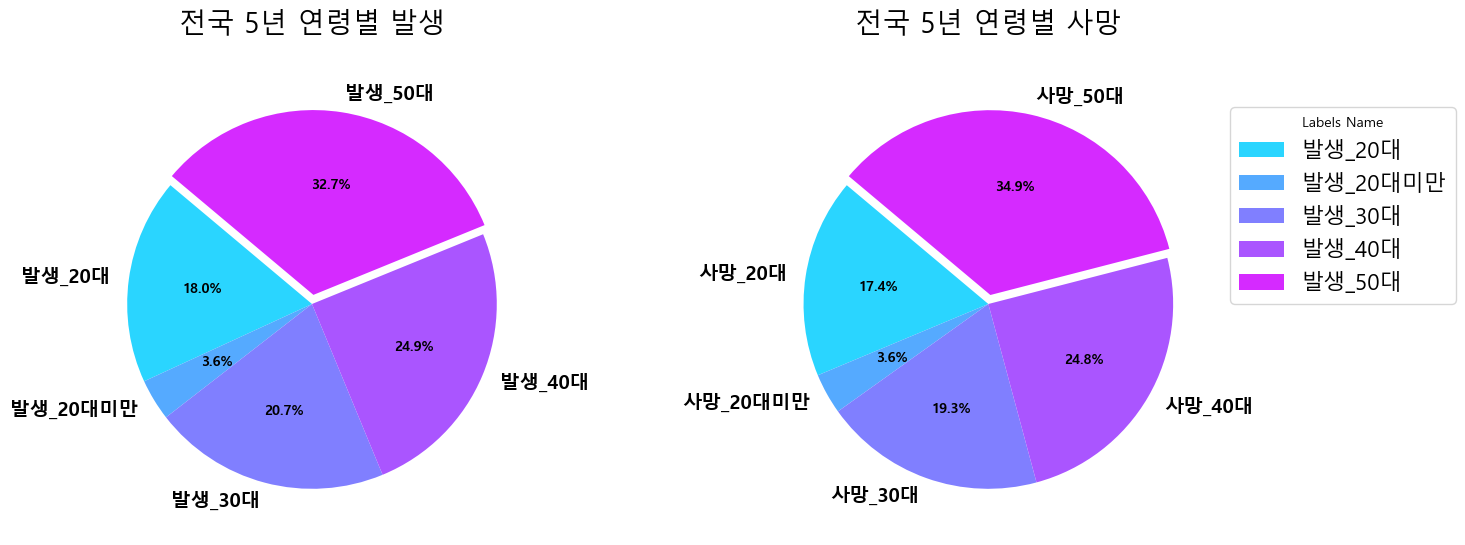

In [501]:
# 발생한 값을 합산
df_age_occurence_sum = age_raw.iloc[:,3:8].sum().reset_index()
df_age_death_sum = age_raw.iloc[:,10:15].sum().reset_index()
explode = [0.0, 0.0, 0.0, 0.0, 0.05]
colors2 = sns.color_palette('cool',len(df_age_occurence_sum['index']))
colors1 = sns.color_palette('Set1',len(df_age_occurence_sum['index']))
# 발생 및 사망 수에 대한 파이 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 발생 수 파이 그래프
ax[0].pie(df_age_occurence_sum[0], labels=df_age_occurence_sum['index'], autopct='%1.1f%%',
          startangle=140, explode = explode,textprops={'color':"black", 'weight':"bold"}, colors= colors2)
ax[0].set_title('전국 5년 연령별 발생', pad=30)

# 사망 수 파이 그래프
ax[1].pie(df_age_death_sum[0], labels=df_age_death_sum['index'], autopct='%1.1f%%',
          explode = explode, startangle=140,textprops={'color':"black", 'weight':"bold"}, colors = colors2)
ax[1].set_title('전국 5년 연령별 사망', pad=30)
plt.legend(labels =df_age_occurence_sum['index'] , bbox_to_anchor = (1., .95),  title="Labels Name")
plt.savefig('savefig_age.png',bbox_inches='tight', pad_inches=0.5)
plt.show()

### 운전경력

In [189]:
total_files = glob(f"../project/result/sigak/*")
tmp_raw = []
# A:C = 시도,군,연도     AF:BA = 법규위반    DR:EE = 연령별  EF:ES = 요일별  ET:FK = 운전경력   (발생건수 , 사망 )
for name in total_files:
    tmp = pd.read_excel(name, usecols='A:C, ET:FK')
    tmp_raw.append(tmp)

drive_raw = pd.concat(tmp_raw)

In [514]:
# 
#drive_raw = drive_raw.drop(['발생_15년이상', '사망_알수없음_y', '발생_알수없음_y', '사망_15년이상'], axis = 1)

In [191]:
drive_raw['발생_5년미만'] = drive_raw.loc[:, '발생_1년미만':'발생_5년미만'].sum(axis=1)
drive_raw['사망_5년미만'] = drive_raw.loc[:, '사망_1년미만':'사망_5년미만'].sum(axis=1)
drive_raw.drop(columns=['발생_1년미만', '발생_2년미만', '발생_3년미만', '발생_4년미만', 
                       '사망_1년미만', '사망_2년미만', '사망_3년미만', '사망_4년미만'], inplace=True)

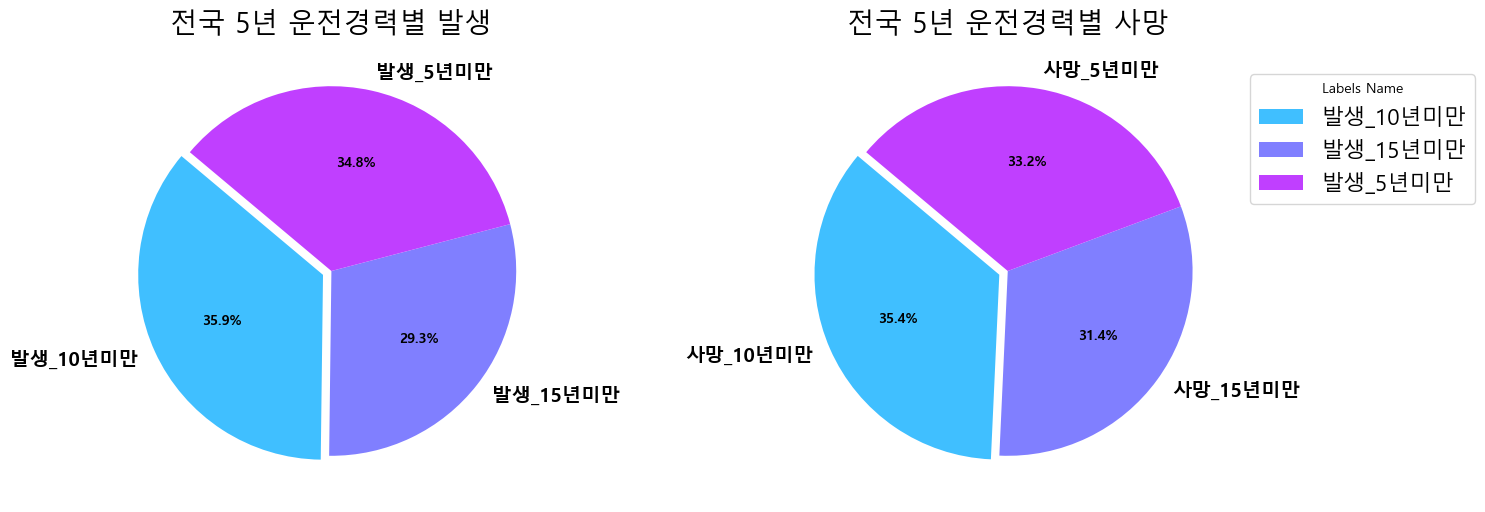

In [505]:
# 발생한 값을 합산
df_drive_occurence_sum = drive_raw.iloc[:,3:6].sum().reset_index()
df_drive_death_sum = drive_raw.iloc[:,6:].sum().reset_index()
explode = [0.05, 0.0, 0.0]

# 발생 및 사망 수에 대한 파이 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
colors1 = sns.color_palette('Set1',len(df_drive_occurence_sum['index']))
colors2 = sns.color_palette('cool',len(df_drive_occurence_sum['index']))
# 발생 수 파이 그래프
ax[0].pie(df_drive_occurence_sum[0], labels=df_drive_occurence_sum['index'], autopct='%1.1f%%',
          startangle=140,  explode = explode,textprops={'color':"black", 'weight':"bold"},colors= colors2)
ax[0].set_title('전국 5년 운전경력별 발생')

# 사망 수 파이 그래프
ax[1].pie(df_drive_death_sum[0], labels=df_drive_death_sum['index'], autopct='%1.1f%%',
          startangle=140, explode = explode,textprops={'color':"black", 'weight':"bold"}, colors= colors2)
ax[1].set_title('전국 5년 운전경력별 사망')
plt.legend(labels =df_drive_occurence_sum['index'] , bbox_to_anchor = (1., .95),  title="Labels Name")
plt.savefig('savefig_drive1.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

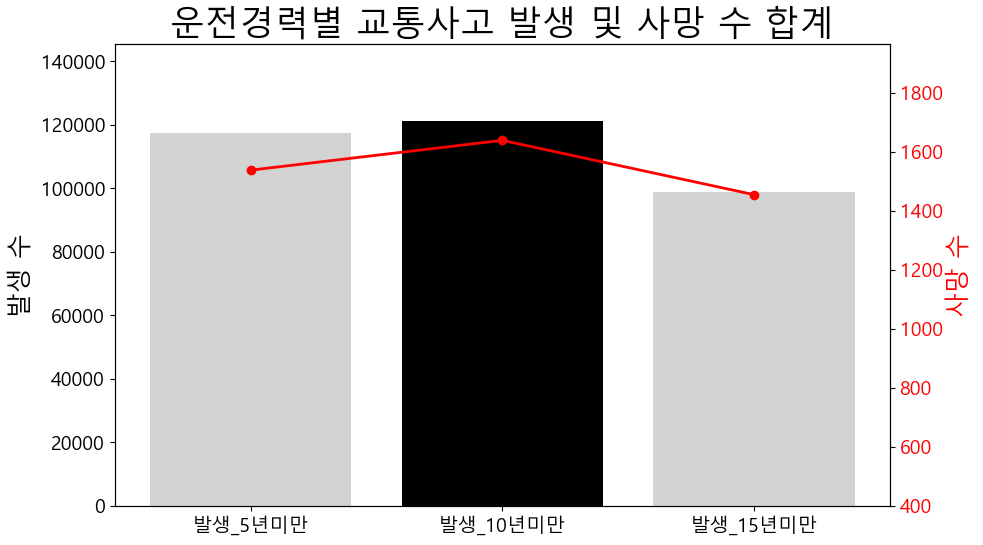

In [227]:
df_drive_occurence_sum = drive_raw.iloc[:,3:6].sum()
df_drive_death_sum = drive_raw.iloc[:,6:].sum()

x_order = ['발생_5년미만', '발생_10년미만', '발생_15년미만']
x_order1 = ['사망_5년미만', '사망_10년미만' , '사망_15년미만']



colors = ['black' if column == '발생_10년미만' else 'lightgrey' for column in x_order]
# seaborn을 사용하여 막대그래프 플로팅
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=x_order, y=df_drive_occurence_sum[x_order], palette=colors)
ax.set_ylabel('발생 수')
ax.tick_params(axis='y', labelcolor='black')

# 사망 수 꺽은선 그래프 추가
ax2 = ax.twinx()
ax2.plot(x_order, df_drive_death_sum[x_order1], marker='o', color='red', label='사망 수')
ax2.set_ylabel('사망 수', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('운전경력별 교통사고 발생 및 사망 수 합계')

ax.set_ylim(0, df_drive_occurence_sum.max() * 1.2)  # ax의 y축 범위 조정
ax2.set_ylim(400, df_drive_death_sum.max() * 1.2)     # ax2의 y축 범위 조정
plt.savefig('savefig_drive1.png', edgecolor='blue', facecolor='#eeeeee')
plt.show()